In [1]:
import pandas as pd
database = pd.read_csv('alcoolismo_infantil.csv') 

X = database[['goout','absences']] 
y = database['target']

from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.3,random_state=42) 

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
max_depths = [2,3,4,5,6,7,8,9,10] 
f1s = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth,random_state=123)
    dt.fit(X_treino,y_treino)
    y_pred = dt.predict(X_teste)
    f1 = f1_score(y_teste, y_pred)
    
    f1s.append( f1 )
    print( '{max_depth} - {f1:5.4f}'.format(max_depth=max_depth, f1=f1s[-1]) )

import numpy as np
bestMaxdepths = max_depths[ np.argmax(f1s) ]


dt.fit(X, y)


import joblib
joblib.dump(dt, 'modelo_dt.joblib')

2 - 0.4118
3 - 0.4737
4 - 0.4375
5 - 0.4242
6 - 0.4571
7 - 0.4571
8 - 0.4571
9 - 0.4118
10 - 0.4571


['modelo_dt.joblib']

Text(0, 0.5, 'True positive rate')

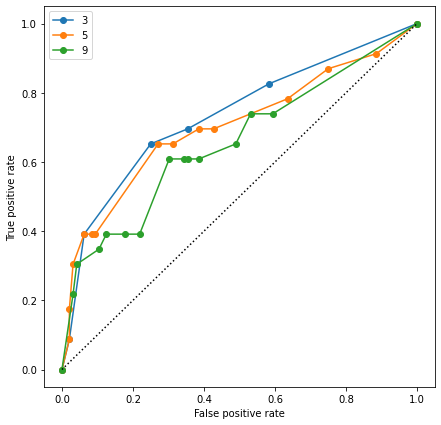

In [18]:
max_depths = [3,5,9]
plt.figure(figsize=(7,7))
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_treino, y_treino)
    fpr,tpr,ths = roc_curve(y_teste, dt.predict_proba(X_teste)[:,1])
    plt.plot(fpr,tpr,marker='o',label=max_depth)
plt.plot([0,1],[0,1],linestyle=':',color='k')
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')